In [32]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from common import Fonts, Data, Images, NWSL, Colors, add_twitter_handle, add_source

In [33]:
df = pd.read_csv("data.csv")
s1 = 2022
s2 = 2023

In [34]:
matches = Data.get_nwsl_matches(season = str(s2))
matches["date"] = pd.to_datetime(matches["date"])
matches = matches[matches["date"] < datetime.datetime(2023,10,17)]
matches

,date,time,season,home,away,home_score,away_score,home_penalty_score,away_penalty_score,home_xg,away_xg,referee,attendance,stadium,is_forfeit,is_extra_time,is_pks,is_playoffs
1106,2023-03-25,14:00,2023,NC,KCC,1,0,0.0,0.0,0.7,0.8,Alex Billeter,4948.0,Sahlen's Stadium at WakeMed Soccer Park,False,False,False,False
1107,2023-03-25,19:00,2023,SD,CHI,3,2,0.0,0.0,2.1,2.5,Elton Garcia,30854.0,Snapdragon Stadium,False,False,False,False
1108,2023-03-26,14:00,2023,POR,ORL,4,0,0.0,0.0,3.7,0.6,Eric Tattersall,15204.0,Providence Park,False,False,False,False
1109,2023-03-26,16:00,2023,WAS,RGN,1,0,0.0,0.0,0.7,2.2,Alyssa Nichols,11281.0,Audi Field,False,False,False,False
1110,2023-03-26,18:00,2023,HOU,LOU,0,0,0.0,0.0,1.3,1.2,Danielle Chesky,5722.0,Shell Energy Stadium,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2023-10-15,14:00,2023,LA,POR,5,1,0.0,0.0,1.5,0.6,Elvis Osmanovic,22000.0,BMO Stadium,False,False,False,False
1273,2023-10-15,16:00,2023,CHI,RGN,0,3,0.0,0.0,0.3,1.9,Anya Voigt,8004.0,SeatGeek Stadium,False,False,False,False
1274,2023-10-15,17:00,2023,ORL,HOU,1,0,0.0,0.0,2.7,1.1,Natalie Simon,8504.0,Exploria Stadium,False,False,False,False
1275,2023-10-15,17:00,2023,WAS,NC,0,1,0.0,0.0,1.0,1.2,Ricardo Fierro,15479.0,Audi Field,False,False,False,False


In [36]:
standings = Data.get_nwsl_standings(matches)
standings["position"] = standings.index
standings.index = standings.index - 1
standings

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points,position
0,SD,11,4,7,31,22,9,37,1
1,POR,10,5,7,42,32,10,35,2
2,NC,9,6,7,29,22,7,33,3
3,RGN,9,5,8,29,24,5,32,4
4,LA,8,7,7,31,30,1,31,5
5,NJNY,8,7,7,25,24,1,31,6
6,ORL,10,1,11,27,28,-1,31,7
7,WAS,7,9,6,26,29,-3,30,8
8,LOU,6,9,7,25,24,1,27,9
9,HOU,6,8,8,16,18,-2,26,10


In [37]:
def plot(metric, x_min, x_max, title, subtitle):
    # Setup
    plt.rcParams["figure.figsize"] = (14, 10)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)
    ax.set_facecolor(Colors.WHITE)

    df_sorted = (
        df[df["season"] == s2].sort_values([metric], ascending=False).reset_index()
    )
    order = standings if metric == "points" else df_sorted

    # Plot data
    for y, row in order.iterrows():
        df_s1 = df[(df["season"] == s1) & (df["team"] == row["team"])]
        df_s2 = df[(df["season"] == s2) & (df["team"] == row["team"])]
        ax.plot(
            [df_s1[metric], df_s2[metric]],
            [y, y],
            color=Colors.LIGHT_GRAY,
            zorder=1,
            lw=5,
        )
        ax.scatter(
            [df_s1[metric]],
            [y],
            edgecolor=NWSL.color(row["team"]),
            lw=5,
            color=Colors.WHITE,
            s=500,
        )
        ax.scatter([df_s2[metric]], [y], color=NWSL.color(row["team"]), lw=5, s=500)

    # Axes
    ax.set_xlim([x_min, x_max + 0.5])
    ax.set_xticks(range(x_min, x_max + 1, 5))
    ax.set_xticklabels(
        range(x_min, x_max + 1, 5),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.set_ylim([11.5, -0.5])
    ax.set_yticks(range(0, 12))
    ax.set_yticklabels(
        order["team"].apply(lambda x: NWSL.name(x)),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.xaxis.grid(True, color=Colors.LIGHT_GRAY, linestyle="--")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)

    # Legend
    offset = (x_max - x_min) / 20
    ax.plot(
        [x_max + offset, x_max + offset],
        [0, 1],
        color=Colors.LIGHT_GRAY,
        zorder=1,
        clip_on=False,
        lw=5,
    )
    ax.scatter(
        [x_max + offset],
        [1],
        edgecolor=Colors.LIGHT_GRAY,
        lw=5,
        color=Colors.WHITE,
        s=500,
        clip_on=False,
    )
    ax.scatter(
        [x_max + offset], [0], color=Colors.LIGHT_GRAY, lw=5, s=500, clip_on=False
    )
    ax.text(
        x_max + offset * 1.5,
        1,
        "2022",
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )
    ax.text(
        x_max + offset * 1.5,
        0,
        "2023",
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )

    # Title
    ax.set_title(
        title,
        fontproperties=Fonts.BARLOW_BOLD,
        size=36,
        ha="left",
        x=0,
        y=1.1,
    )

    # Subtitle
    ax.text(
        x_min,
        -1,
        subtitle,
        fontproperties=Fonts.BARLOW,
        size=20,
        ha="left",
    )

    # Twitter logo and username
    add_twitter_handle(fig, x=0.81, y=0.04, fs=14, w=0.025)
    # add_source(fig, "nwslR/nwslpy", x=0.13, y=0.04, fs=14)

    plt.savefig(
        "images/" + metric + "_" + str(s2) + ".png",
        bbox_inches="tight",
        transparent=False,
        pad_inches=0.5,
        dpi=200,
    )

<Figure size 5600x4000 with 0 Axes>

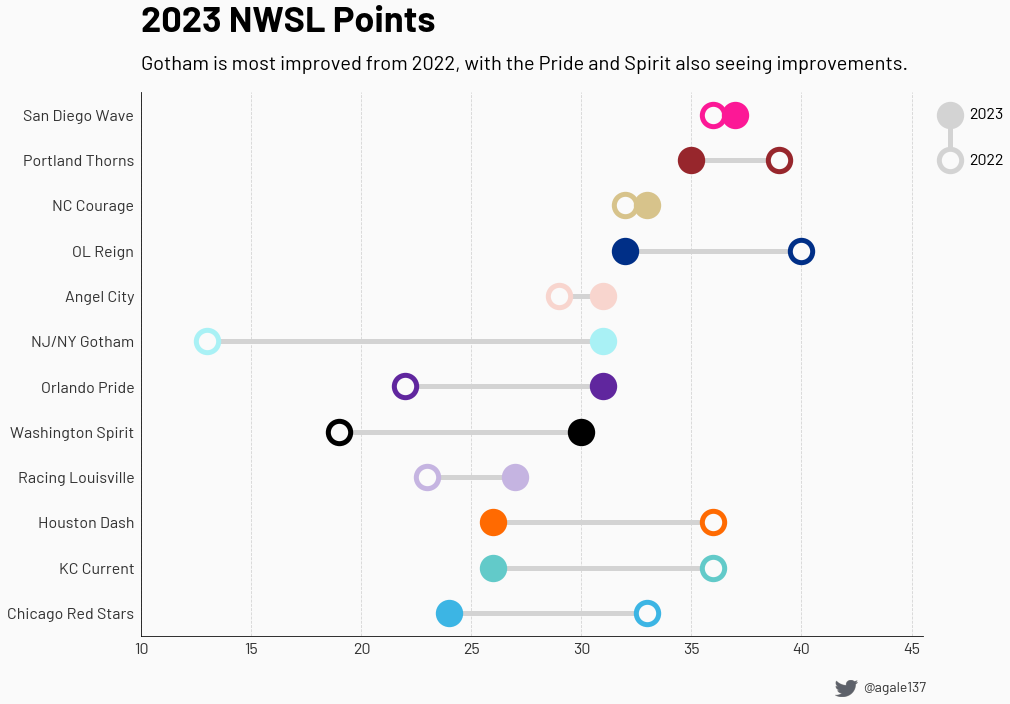

In [38]:
plot(
    "points",
    10,
    45,
    "2023 NWSL Points",
    "Gotham is most improved from 2022, with the Pride and Spirit also seeing improvements.",
)

<Figure size 5600x4000 with 0 Axes>

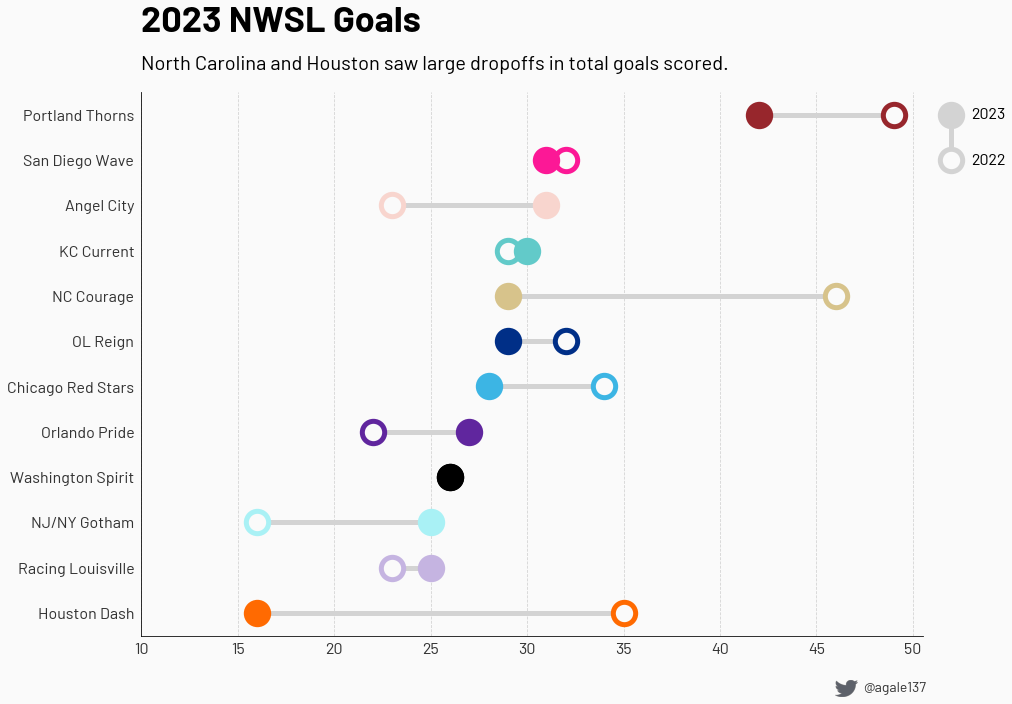

In [39]:
plot(
    "goals_for",
    10,
    50,
    "2023 NWSL Goals",
    "North Carolina and Houston saw large dropoffs in total goals scored.",
)

<Figure size 5600x4000 with 0 Axes>

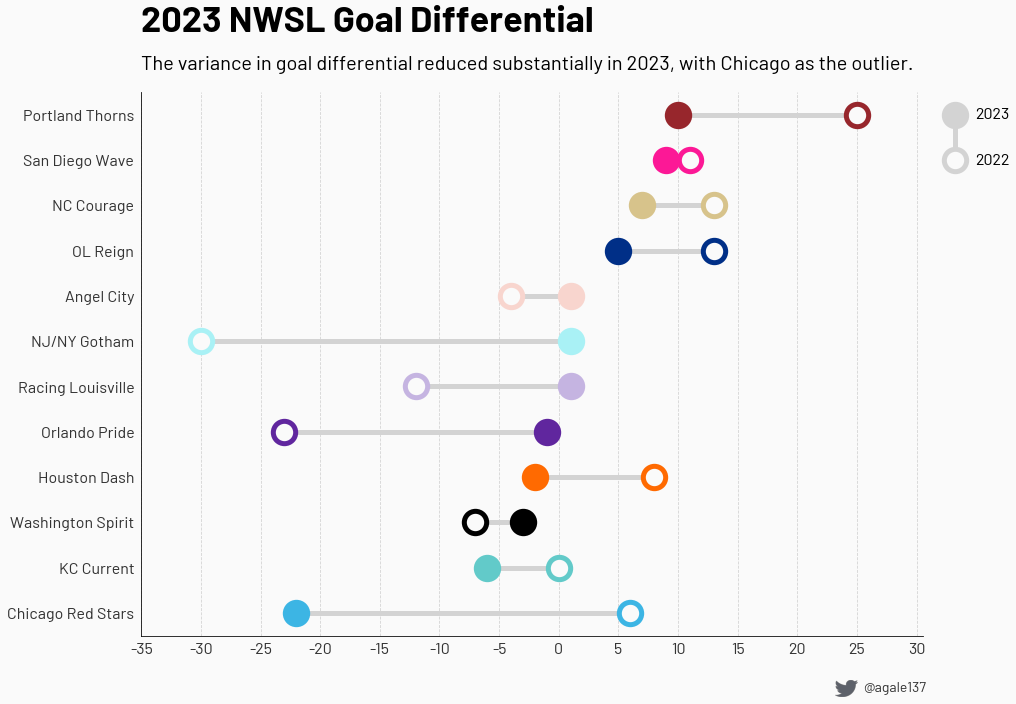

In [40]:
plot(
    "goals_diff",
    -35,
    30,
    "2023 NWSL Goal Differential",
    "The variance in goal differential reduced substantially in 2023, with Chicago as the outlier.",
)